In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch
from kan import *

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,7,2], grid=3, k=3, seed=0)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取xlsx文件
file_path = 'D:\OneDrive - Officials\OneDrive - Mraz Cindy\done\毕设资料\计算公式说明\数据库.xlsx'  # 替换为你的xlsx文件路径
df = pd.read_excel(file_path, engine='openpyxl')

# 打乱行顺序并按8:2的比例分成训练集和测试集
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 输出结果
print("训练集样本数:", len(train_df))
print("测试集样本数:", len(test_df))


训练集样本数: 307
测试集样本数: 77


In [3]:
# 提取第2，3，4，5列的数据
input = train_df.iloc[:, 1:5]
output = train_df.iloc[:, 5:7]
test_input = test_df.iloc[:, 1:5]
test_label = test_df.iloc[:, 5:7]
# 将DataFrame转换为numpy数组并调整其维度为4
array1 = input.to_numpy()
array2 = output.to_numpy()
array3 = test_input.to_numpy()
array4 = test_label.to_numpy()
input=torch.tensor(array1, dtype=torch.float32)
ouput=torch.tensor(array2, dtype=torch.float32)
test_input=torch.tensor(array3, dtype=torch.float32)
test_label=torch.tensor(array4, dtype=torch.float32)

In [4]:
import torch

def normalize_columns(tensor):
    # 确保输入是2D张量
    assert tensor.dim() == 2, "Input tensor must be 2D"
    
    # 获取最小值和最大值
    col_min = tensor.min(dim=0, keepdim=True).values
    col_max = tensor.max(dim=0, keepdim=True).values
    
    # 防止除以零的情况
    denom = col_max - col_min
    denom[denom == 0] = 1  # 如果列中所有值相等，避免除以零
    
    # 进行归一化
    normalized_tensor = (tensor - col_min) / denom
    return normalized_tensor
# 对每一列进行归一化
input= normalize_columns(input)
ouput= normalize_columns(ouput)
test_input= normalize_columns(test_input)
test_label= normalize_columns(test_label)
dataset={'train_input':input,'test_input':test_input,'train_label':ouput,'test_label':test_label}


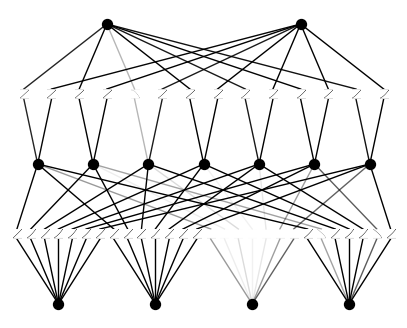

In [5]:
model(input)
model.plot(beta=100)

train loss: 2.33e-01 | test loss: 2.78e-01 | reg: 7.62e+01 : 100%|██| 50/50 [00:12<00:00,  3.96it/s]


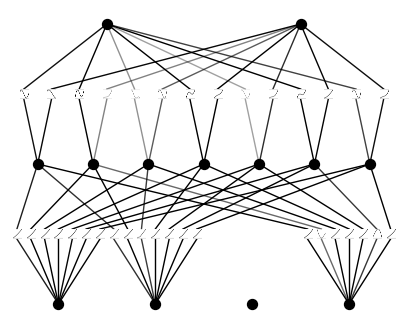

In [6]:
# train the model
model.train(dataset, opt="LBFGS", steps=50, lamb=0.01, lamb_entropy=10.);
model.plot()

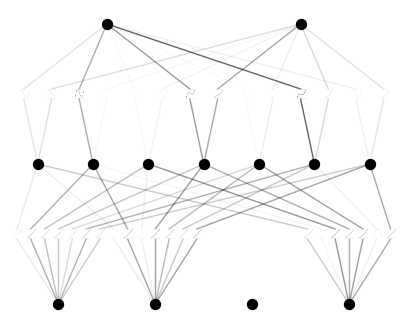

In [7]:
model.prune()
model.plot(mask=True)

train loss: 2.01e-02 | test loss: 7.69e-02 | reg: 9.18e+01 : 100%|██| 50/50 [00:27<00:00,  1.81it/s]


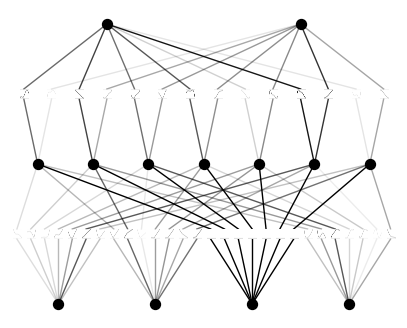

In [8]:
model=model.prune()
model.train(dataset, opt="LBFGS", steps=50)
model(dataset['train_input'])
model.plot()

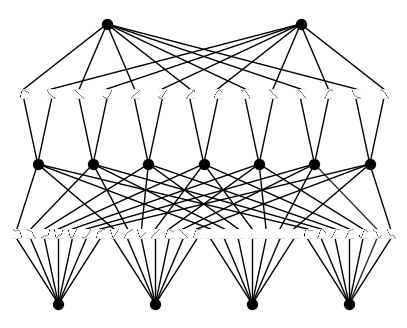

: 

In [33]:

model=model.prune()
#model.train(dataset, opt="LBFGS", steps=50)
model(dataset['train_input'])
model.plot(beta=100)

In [9]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=['tanh','abs','x^2','x^4','x^3','sqrt'])

fixing (0,0,0) with x^3, r2=0.9872428774833679
fixing (0,0,1) with abs, r2=0.32668960094451904
fixing (0,0,2) with tanh, r2=0.9942721724510193
fixing (0,0,3) with x^3, r2=0.9725112318992615
fixing (0,0,4) with abs, r2=0.9905369877815247
fixing (0,0,5) with tanh, r2=0.9987265467643738
fixing (0,0,6) with x^2, r2=0.839989960193634
fixing (0,1,0) with x^4, r2=1.0000004768371582
fixing (0,1,1) with x^3, r2=1.0000005960464478
fixing (0,1,2) with x^4, r2=1.0000004768371582
fixing (0,1,3) with x^2, r2=1.0000005960464478
fixing (0,1,4) with x^3, r2=1.0000007152557373
fixing (0,1,5) with x^4, r2=1.0000007152557373
fixing (0,1,6) with x^3, r2=1.0000007152557373
fixing (0,2,0) with x^4, r2=1.5787091550483953e-14
fixing (0,2,1) with x^4, r2=1.7541212716227594e-15
fixing (0,2,2) with x^4, r2=9.86693221905247e-16
fixing (0,2,3) with x^4, r2=1.7541212716227594e-15
fixing (0,2,4) with sqrt, r2=0.0
fixing (0,2,5) with x^4, r2=7.016485086491038e-15
fixing (0,2,6) with x^4, r2=9.86693221905247e-16
fixing

In [10]:
#model.auto_symbolic(lib=['tanh','sin','x^2','x^4','x^3','sqrt'])
#model.auto_symbolic(lib=lib)
model=model.prune()
model.train(dataset, opt='LBFGS', steps=50, lamb=0.0, update_grid=False)
model.symbolic_formula()

description:   0%|                                                           | 0/50 [00:00<?, ?it/s]

train loss: nan | test loss: nan | reg: nan :  14%|██▌               | 7/50 [00:05<00:31,  1.35it/s]


KeyboardInterrupt: 

In [14]:
predice=model(dataset['test_input'])

In [15]:

preds=predice
labels=dataset['test_label']
preds_np = preds.detach().numpy()
labels_np = labels.detach().numpy()

# 计算准确率
# 这里假设我们对两列特征分别进行分类，并计算每列特征的准确率

# 计算 R²
r2_feature1 = r2_score(labels_np[:, 0], preds_np[:, 0])
r2_feature2 = r2_score(labels_np[:, 1], preds_np[:, 1])


print(f"R² Feature 1: {r2_feature1}")
print(f"R² Feature 2: {r2_feature2}")

# 绘制对比图
plt.figure(figsize=(12, 6))

# 对比图：特征1
plt.subplot(1, 2, 1)
plt.scatter(labels_np[:, 0], preds_np[:, 0], c='blue', label='Predictions')
plt.plot([labels_np[:, 0].min(), labels_np[:, 0].max()], [labels_np[:, 0].min(), labels_np[:, 0].max()], 'r--')
plt.xlabel('Actual Values (Feature 1)')
plt.ylabel('Predicted Values (Feature 1)')
plt.title('Feature 1: Actual vs Predicted')
plt.legend()

# 对比图：特征2
plt.subplot(1, 2, 2)
plt.scatter(labels_np[:, 1], preds_np[:, 1], c='green', label='Predictions')
plt.plot([labels_np[:, 1].min(), labels_np[:, 1].max()], [labels_np[:, 1].min(), labels_np[:, 1].max()], 'r--')
plt.xlabel('Actual Values (Feature 2)')
plt.ylabel('Predicted Values (Feature 2)')
plt.title('Feature 2: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

ValueError: Input contains NaN.

截断

In [35]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

AttributeError: 'KAN' object has no attribute 'acts'

In [36]:
#model.auto_symbolic(lib=['tanh','sin','x^2','x^4','x^3','sqrt','abs'])
model.auto_symbolic(lib=lib)
model.train(dataset, opt='LBFGS', steps=50, lamb=0.0, update_grid=False)
model.symbolic_formula()

skipping (0,0,0) since already symbolic


AttributeError: 'KAN' object has no attribute 'acts'

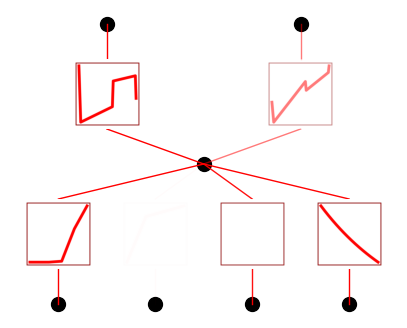

In [12]:
model.plot()

In [13]:
model.auto_symbolic(lib=['exp','sin','x^2','x^3','x^4','log','sqrt','tanh','abs','x'])
model.train(dataset, opt='LBFGS', steps=50, lamb=0.00, update_grid=False)
model.symbolic_formula()

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (1,0,0) since already symbolic
skipping (1,0,1) since already symbolic


train loss: 2.17e-01 | test loss: 2.13e-01 | reg: 9.60e+00 : 100%|██| 50/50 [00:01<00:00, 25.43it/s]


([-5.63*sin(3.18*tanh(10.0*x_1 - 7.6) - 9.73 + 0.07*exp(-0.64*x_4) - 0.07*exp(-4.88*x_2)) - 1.24,
  0.91*sin(5.05*tanh(10.0*x_1 - 7.6) - 23.23 + 0.12*exp(-0.64*x_4) - 0.11*exp(-4.88*x_2)) + 0.24],
 [x_1, x_2, x_3, x_4])

In [14]:
model.symbolic_formula(floating_digit=4)

([-5.6313*sin(3.1843*tanh(10.0*x_1 - 7.6) - 9.7315 + 0.0748*exp(-0.6358*x_4) - 0.0683*exp(-4.876*x_2)) - 1.2353,
  0.9054*sin(5.0479*tanh(10.0*x_1 - 7.6) - 23.2256 + 0.1186*exp(-0.6358*x_4) - 0.1082*exp(-4.876*x_2)) + 0.2435],
 [x_1, x_2, x_3, x_4])